# Base de datos

En el siguiente notebook vamos a mostrar el contenido de nuestra base de datos, cargándolo desde AWS, para ver las tablas que lo componen y al final obtendremos algunos insights a petición del equipo de Sukalde, en donde nos solicitaban algunas gráficas para obtener información entre los meses de marzo y agosto de 2023.

# Creacion de Pandas Dataframes desde una Base de Datos MariaDB

La creación de la base de datos se realizó desde MariaDB. Una vez que se establecieron las tablas y las conexiones entre ellas, alojamos la base de datos en AWS. En primer lugar nos conectamos con la base de datos:

## Creacion de la conexión con la base de datos

In [ ]:
pip install mysql-connector-python

In [ ]:
import mysql.connector

In [ ]:
# Configuración de la conexión
host = 
user = 
password = 
database = 
port = 

try:
    conexion = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database,
        port=port
    )

    if conexion.is_connected():
        print("Conexión exitosa a la base de datos")

except mysql.connector.Error as error:
    print("Error al conectarse a la base de datos: {}".format(error))


Conexión exitosa a la base de datos


## Exploracion del contenido de la base de datos

In [ ]:
# Vamos a ver las tablas que contiene

# Debemos crear un cursor para ejecutar consultas
cursor = conexion.cursor()

# Consulta para obtener la lista de tablas
consulta_tablas = "SHOW TABLES"

# Ejecutamos esa consulta
cursor.execute(consulta_tablas)

# Obtenemos los resultados
tablas = cursor.fetchall()

# Vemos las tablas que contiene
print("Tablas disponibles:")
for tabla in tablas:
    print(tabla[0])


Tablas disponibles:
allergens
families
menu_pick_up_times
menu_recipes
menu_type_families
menu_types
menus
migrations
options
order_item_adaptions
order_items
orders
pick_up_points
pick_up_times
recipe_allergens
recipe_options
recipes
slots
subscription_allergens
subscription_options
subscriptions
users


Disponemos de un conjunto de tablas que contienen información de los miembros de Sukalde y del historial de pedidos.

## Almacenamiento de los dataframes

A continuación vamos a convertir estas tablas en diferentes DataFrames de Pandas, de manera que se facilita su manipulación y preprocesamiento. Iremos mostrando una a una el contenido de las tablas.

In [ ]:
# Vamos a crear una lista con las tablas transformadas a dataframes de Pandas

import pandas as pd

# Convertimos los resultados a una lista de nombres de tablas
nombres_tablas = [tabla[0] for tabla in tablas]

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

# Crear DataFrames para cada tabla
for nombre_tabla in nombres_tablas:
    consulta_datos = f"SELECT * FROM {nombre_tabla}"
    cursor.execute(consulta_datos)
    datos = cursor.fetchall()
    column_names = [i[0] for i in cursor.description]
    df = pd.DataFrame(datos, columns=column_names)
    dataframes[nombre_tabla] = df


## Generacion de dataframes

Las siguientes celdas de código muestran el contenido de las tablas de la base de datos. Éste trabajo se realizó para poder obtener un mejor conocimiento del contenido disponible y ver cuáles son aquellas tablas que podrían servirnos para los análisis posteriores.

Se extraen todas las tablas a través de consultas SQL y en algunos casos, para facilitar su comprensión, realizamos "joins" entre tablas para poder tener el nombre al que hace referencia algún ID o algún código.

No realizamos ningún comentario adicional, se ha dejado el contenido de estas exploraciones por si necesitábamos las consultas posteriormente.

### Allergens

In [ ]:
allergens = pd.read_sql("SELECT * FROM allergens", conexion,  index_col= 'id')
allergens.tail()

<ipython-input-156-217ce4fceeda>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  allergens = pd.read_sql("SELECT * FROM allergens", conexion,  index_col= 'id')


,name,color,description,created_at,updated_at,icon
id,,,,,,
14,Arraina || Pescado,#00eeff,Arraina || Pescado,2021-09-06 21:54:18,2022-10-13 10:23:50,"<?xml version=""1.0"" encoding=""utf-8""?>\n<!-- G..."
15,Sesamoa || SÃ©samo,#89393a,Sesamoa || SÃ©samo,2021-09-06 21:54:36,2022-10-13 10:24:00,"<?xml version=""1.0"" encoding=""utf-8""?>\n<!-- G..."
16,Soja || Soja,#00801a,Soja || Soja,2021-09-06 21:54:51,2022-10-13 10:24:11,"<?xml version=""1.0"" encoding=""utf-8""?>\n<!-- G..."
17,Sulfitoak || Sulfitos,#9f7ab3,Sulfitoak || Sulfitos,2021-09-06 21:55:16,2022-10-13 10:24:22,"<?xml version=""1.0"" encoding=""utf-8""?>\n<!-- G..."
18,Berenjena || Berenjena,#8b18d8,Berenjena || Berenjena,2022-05-28 10:18:34,2022-10-13 10:24:35,"<?xml version=""1.0"" encoding=""UTF-8"" standalon..."


In [ ]:
allergens.columns

Index(['name', 'color', 'description', 'created_at', 'updated_at', 'icon'], dtype='object')

### Families

In [ ]:
families = pd.read_sql("SELECT * FROM families", conexion,  index_col= 'id')
families.tail(30)

<ipython-input-158-2286ef3db2c3>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  families = pd.read_sql("SELECT * FROM families", conexion,  index_col= 'id')


,name,description,created_at,updated_at
id,,,,
1,Lekaleak || Legumbres,Legumbres estofadas con un sofrito de verduras...,2021-09-06 21:57:40,2022-05-10 14:57:22
2,Barazkiak || Verduras,Platos elaborados a base de las verduras que n...,2021-09-06 21:57:49,2022-11-20 15:26:04
8,Osagarriak || Complementos,Productos opcionales para complementar el menÃº,2021-09-09 14:21:17,2022-05-10 22:35:10
10,"Pastak, Arrozak eta Entsaladak || Pastas, Arro...",Pasta cocida o arroz cocido en blanco con una ...,2022-05-10 14:55:04,2022-05-10 22:55:38
12,Kremak eta Saldak || Cremas y Caldos,0.75L de crema de verduras ecolÃ³gicas cultiva...,2022-05-10 22:37:51,2022-05-10 22:57:17
15,Arraia || Pescado,None,2022-09-09 13:45:05,2022-09-09 13:45:05
16,Haragia || Carne,None,2022-09-09 13:45:14,2022-09-09 13:45:14
17,Ogia || Pan,None,2022-10-16 10:37:47,2022-10-21 14:35:17
18,Esneki eta Marmeladak || Lacteos y mermeladas,None,2022-10-21 14:35:31,2023-05-15 11:52:08


In [ ]:
families.columns

Index(['name', 'description', 'created_at', 'updated_at'], dtype='object')

### Menu_recipes(*)

In [ ]:
menu_recipes = pd.read_sql("SELECT * FROM menu_recipes", conexion, index_col= 'id')
menu_recipes.head()

<ipython-input-160-3622d331fe69>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_recipes = pd.read_sql("SELECT * FROM menu_recipes", conexion, index_col= 'id')


,menu_id,recipe_id,day_1,day_2,repeatable,purchaseable,created_at,updated_at
id,,,,,,,,
1,1,1,1,1,1,1,None,2021-09-07 11:19:17
2,1,2,1,1,1,1,None,2021-09-07 11:19:17
3,1,4,1,1,1,1,None,2021-09-07 11:19:16
4,1,6,1,1,1,1,None,2021-09-07 11:19:15
5,1,7,1,1,1,1,None,2021-09-07 11:19:14


In [ ]:
menu_recipes.columns

Index(['menu_id', 'recipe_id', 'day_1', 'day_2', 'repeatable', 'purchaseable',
       'created_at', 'updated_at'],
      dtype='object')

Vamos a hacer un "Join" entre las tablas (1) menu_recipes, (2) menus y (3) recipes, para ver el nombre real de los platos.

In [ ]:
menu_recipes_final = pd.read_sql("SELECT mr.id, m.name AS menu, r.name AS recipe, mr.day_1, mr.day_2, mr.repeatable, mr.purchaseable, mr.created_at, mr.updated_at FROM menu_recipes AS mr LEFT JOIN menus AS m ON mr.menu_id=m.id LEFT JOIN recipes AS r ON mr.recipe_id = r.id", conexion, index_col= 'id')
menu_recipes_final.tail()

<ipython-input-162-00ee171b732b>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_recipes_final = pd.read_sql("SELECT mr.id, m.name AS menu, r.name AS recipe, mr.day_1, mr.day_2, mr.repeatable, mr.purchaseable, mr.created_at, mr.updated_at FROM menu_recipes AS mr LEFT JOIN menus AS m ON mr.menu_id=m.id LEFT JOIN recipes AS r ON mr.recipe_id = r.id", conexion, index_col= 'id')


,menu,recipe,day_1,day_2,repeatable,purchaseable,created_at,updated_at
id,,,,,,,,
1543,Iraileko lehen astea || Primera semana de sept...,Marmitakoa || Marmitako,1,0,1,1,None,2023-08-25 13:34:23
1544,Iraileko lehen astea || Primera semana de sept...,Berenjenas rellenas de bolognesa y setas || Bo...,1,0,0,1,None,2023-08-25 13:34:05
1545,Iraileko lehen astea || Primera semana de sept...,Barazki lassaina || Lassagna de verduras,0,1,1,1,None,2023-08-25 13:34:39
1546,Iraileko lehen astea || Primera semana de sept...,Arrain eta zerba krepeak || Crepes de pescado ...,0,1,0,1,None,2023-08-25 13:34:06
1547,Iraileko lehen astea || Primera semana de sept...,Txerri solomoa errioxar erara || Lomo de cerdo...,0,1,0,1,None,2023-08-25 13:34:06


In [ ]:
menu_recipes_final.columns

Index(['menu', 'recipe', 'day_1', 'day_2', 'repeatable', 'purchaseable',
       'created_at', 'updated_at'],
      dtype='object')

### Menu_pick_up_times (*)

In [ ]:
menu_pick_up_times = pd.read_sql("SELECT * FROM menu_pick_up_times", conexion, index_col= 'id')
menu_pick_up_times.tail()

<ipython-input-164-b06250e90138>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_pick_up_times = pd.read_sql("SELECT * FROM menu_pick_up_times", conexion, index_col= 'id')


,menu_id,pick_up_time_id,created_at,updated_at
id,,,,
184,57,5,None,None
185,58,1,None,None
186,58,2,None,None
187,58,3,None,None
188,58,5,None,None


In [ ]:
menu_pick_up_times.columns

Index(['menu_id', 'pick_up_time_id', 'created_at', 'updated_at'], dtype='object')

Hacemos nuevamente "Join" entre las tablas (1) menu_pick_up_times, (2) menus y (3) pick_up_times para ver el nombre de los platos.

In [ ]:
menu_pick_up_times_final = pd.read_sql("SELECT mput.id, m.name AS menu, put.name AS pick_up_time, mput.created_at, mput.updated_at FROM menu_pick_up_times AS mput LEFT JOIN menus AS m ON mput.menu_id=m.id LEFT JOIN pick_up_times AS put ON mput.pick_up_time_id = put.id", conexion, index_col= 'id')
menu_pick_up_times_final.tail()

<ipython-input-166-9aabcd96e43e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_pick_up_times_final = pd.read_sql("SELECT mput.id, m.name AS menu, put.name AS pick_up_time, mput.created_at, mput.updated_at FROM menu_pick_up_times AS mput LEFT JOIN menus AS m ON mput.menu_id=m.id LEFT JOIN pick_up_times AS put ON mput.pick_up_time_id = put.id", conexion, index_col= 'id')


,menu,pick_up_time,created_at,updated_at
id,,,,
184,Abuztuko Laugarren astea || Cuarta semana de a...,Recogida jueves de 10.30 a 16.00,None,None
185,Iraileko lehen astea || Primera semana de sept...,Recogida Lunes de 18.30 a 20.30,None,None
186,Iraileko lehen astea || Primera semana de sept...,Recogida Martes de 10.30 a 16.00,None,None
187,Iraileko lehen astea || Primera semana de sept...,Recogida Miercoles de 18.30 a 20:30,None,None
188,Iraileko lehen astea || Primera semana de sept...,Recogida jueves de 10.30 a 16.00,None,None


In [ ]:
menu_pick_up_times_final.columns

Index(['menu', 'pick_up_time', 'created_at', 'updated_at'], dtype='object')

### Menu_type_families(*)

In [ ]:
menu_type_families = pd.read_sql("SELECT * FROM menu_type_families", conexion, index_col= 'id')
menu_type_families.tail()

<ipython-input-168-7c4067186fb1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_type_families = pd.read_sql("SELECT * FROM menu_type_families", conexion, index_col= 'id')


,menu_type_id,family_id,created_at,updated_at,total_week
id,,,,,
235,19,28,None,2023-05-23 08:27:12,10.0
236,19,12,None,2023-05-23 08:27:15,10.0
237,19,16,None,2023-05-23 08:27:54,2.0
238,19,15,None,2023-05-23 08:27:54,2.0
239,19,2,None,2023-05-23 08:27:58,2.0


In [ ]:
menu_type_families.columns

Index(['menu_type_id', 'family_id', 'created_at', 'updated_at', 'total_week'], dtype='object')

"Join" entre la tabla (1) menu_type_families, (2) meny_types y (3) families, para ver el nombre real de las familias de los platos.

In [ ]:
menu_type_families_final = pd.read_sql("SELECT mtf.id, mt.name AS menu_type, f.name AS family, mtf.created_at, mtf.updated_at, mtf.total_week FROM menu_type_families AS mtf LEFT JOIN menu_types AS mt ON mtf.menu_type_id=mt.id LEFT JOIN families AS f ON mtf.family_id = f.id", conexion, index_col= 'id')
menu_type_families_final.tail()

<ipython-input-170-d2f222ddf575>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_type_families_final = pd.read_sql("SELECT mtf.id, mt.name AS menu_type, f.name AS family, mtf.created_at, mtf.updated_at, mtf.total_week FROM menu_type_families AS mtf LEFT JOIN menu_types AS mt ON mtf.menu_type_id=mt.id LEFT JOIN families AS f ON mtf.family_id = f.id", conexion, index_col= 'id')


,menu_type,family,created_at,updated_at,total_week
id,,,,,
235,MenÃº mixto completo,Entsaladak || Ensaladas,None,2023-05-23 08:27:12,10.0
236,MenÃº mixto completo,Kremak eta Saldak || Cremas y Caldos,None,2023-05-23 08:27:15,10.0
237,MenÃº mixto completo,Haragia || Carne,None,2023-05-23 08:27:54,2.0
238,MenÃº mixto completo,Arraia || Pescado,None,2023-05-23 08:27:54,2.0
239,MenÃº mixto completo,Barazkiak || Verduras,None,2023-05-23 08:27:58,2.0


### Menu_types

In [ ]:
menu_types = pd.read_sql("SELECT * FROM menu_types", conexion, index_col= 'id')
menu_types.tail()

<ipython-input-172-47049fb3ff86>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menu_types = pd.read_sql("SELECT * FROM menu_types", conexion, index_col= 'id')


,name,day_1,day_2,repeatable_always,created_at,updated_at
id,,,,,,
14,(BietaBi/DosmÃ¡sDos) â†’ Begetariano menua //...,2,2,0,2022-02-15 18:43:56,2022-09-09 10:59:18
15,(BietaBi/DosmÃ¡sDos) â†’ Oinarrizko menua / ...,2,2,0,2022-02-15 18:45:55,2023-05-18 17:14:28
17,Extra bakarrik || Solo extras,0,0,0,2022-09-27 11:00:07,2022-09-27 11:00:07
18,Osoa/Completo -> REPETIBLE,4,4,1,2023-01-25 18:04:27,2023-01-25 18:04:27
19,MenÃº mixto completo,4,4,0,2023-05-23 08:25:31,2023-05-23 08:28:06


In [ ]:
menu_types.columns

Index(['name', 'day_1', 'day_2', 'repeatable_always', 'created_at',
       'updated_at'],
      dtype='object')

### Menus

In [ ]:
menus = pd.read_sql("SELECT * FROM menus", conexion, index_col= 'id')
menus.tail()

<ipython-input-174-5e8099bbc721>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  menus = pd.read_sql("SELECT * FROM menus", conexion, index_col= 'id')


,name,week,is_active,created_at,updated_at
id,,,,,
54,Abuztuko lehen astea || Primera semana de Agosto,2023-07-31,0,2023-07-18 10:27:45,2023-07-31 11:35:25
55,Abuztuko bigarren astea || segunda semana de a...,2023-08-07,0,2023-07-18 10:37:22,2023-08-06 19:32:00
56,Abuztuko hirugarren astea || tercera semana de...,2023-08-21,0,2023-07-23 09:09:31,2023-08-22 22:52:22
57,Abuztuko Laugarren astea || Cuarta semana de a...,2023-08-28,0,2023-08-18 10:35:09,2023-08-26 21:28:35
58,Iraileko lehen astea || Primera semana de sept...,2023-09-04,1,2023-08-25 13:26:25,2023-08-28 07:12:10


In [ ]:
menus.columns

Index(['name', 'week', 'is_active', 'created_at', 'updated_at'], dtype='object')

### Migrations

In [ ]:
migrations = pd.read_sql("SELECT * FROM migrations", conexion, index_col= 'id')
migrations.tail()

<ipython-input-176-5902e0d5091c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  migrations = pd.read_sql("SELECT * FROM migrations", conexion, index_col= 'id')


,migration,batch
id,,
49,2023_07_13_181550_drop_filament_users_and_fila...,7
50,2023_07_13_182141_add_is_admin_to_users,7
51,2023_07_13_192726_add_expires_at_to_personal_a...,7
52,2023_07_17_160847_add_is_txandapasa_to_orders,7
53,2023_08_16_100404_add_ui_fields_to_pick_up_points,7


In [ ]:
migrations.columns

Index(['migration', 'batch'], dtype='object')

### Options

In [ ]:
options = pd.read_sql("SELECT * FROM options", conexion, index_col= 'id')
options.tail()

<ipython-input-178-35815493162e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  options = pd.read_sql("SELECT * FROM options", conexion, index_col= 'id')


,name,color,description,created_at,updated_at
id,,,,,
50,Mahatsa / Uva,None,None,2023-03-15 13:06:37,2023-03-15 13:07:35
51,Xerratua || Rebanado,None,None,2023-03-28 08:44:25,2023-03-28 08:44:25
52,Marrubia || Fresa,None,None,2023-05-22 12:11:45,2023-05-22 12:11:45
53,Txokolate beltza || Chocolate negro,None,None,2023-07-17 12:28:13,2023-07-17 12:28:13
54,Txokote zuria || Chocolate blanco,None,None,2023-07-17 12:28:32,2023-07-17 12:28:32


In [ ]:
options.columns

Index(['name', 'color', 'description', 'created_at', 'updated_at'], dtype='object')

### Order_item_adaptions(*)

In [ ]:
order_item_adaptions = pd.read_sql("SELECT * FROM order_item_adaptions", conexion, index_col= 'id')
order_item_adaptions.tail()

<ipython-input-180-2e5d7de1b285>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_item_adaptions = pd.read_sql("SELECT * FROM order_item_adaptions", conexion, index_col= 'id')


,order_item_id,remote_id,remote_type,created_at,updated_at
id,,,,,
1285,14646,54,App\Models\Option,None,None
1286,14647,4,App\Models\Allergen,None,None
1287,14648,3,App\Models\Allergen,None,None
1288,14650,4,App\Models\Allergen,None,None
1289,14672,9,App\Models\Allergen,None,None


In [ ]:
order_item_adaptions.columns

Index(['order_item_id', 'remote_id', 'remote_type', 'created_at',
       'updated_at'],
      dtype='object')

"Join" entre las tablas (1) order_item_adaptions y (2) order_items.

In [ ]:
order_item_adaptions_final = pd.read_sql("SELECT oia.id, oi.name AS order_item, oia.remote_id, oia.remote_type, oia.created_at, oia.updated_at FROM order_item_adaptions AS oia LEFT JOIN order_items AS oi ON oia.order_item_id=oi.id", conexion, index_col= 'id')
order_item_adaptions_final.tail()

<ipython-input-182-39bd6ba12bcd>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_item_adaptions_final = pd.read_sql("SELECT oia.id, oi.name AS order_item, oia.remote_id, oia.remote_type, oia.created_at, oia.updated_at FROM order_item_adaptions AS oia LEFT JOIN order_items AS oi ON oia.order_item_id=oi.id", conexion, index_col= 'id')


,order_item,remote_id,remote_type,created_at,updated_at
id,,,,,
1285,OIT-46-279-58-2567,54,App\Models\Option,None,None
1286,OIT-109-312-58-2568,4,App\Models\Allergen,None,None
1287,OIT-109-312-58-2568,3,App\Models\Allergen,None,None
1288,OIT-109-312-58-2568,4,App\Models\Allergen,None,None
1289,OIT-105-319-58-2573,9,App\Models\Allergen,None,None


In [ ]:
order_item_adaptions_final.columns

Index(['order_item', 'remote_id', 'remote_type', 'created_at', 'updated_at'], dtype='object')

### Order_items(*)

In [ ]:
order_items = pd.read_sql("SELECT * FROM order_items", conexion, index_col= 'id')
order_items.tail()

<ipython-input-184-12240e059679>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_items = pd.read_sql("SELECT * FROM order_items", conexion, index_col= 'id')


,name,day,order_id,recipe_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,
14682,OIT-126-310-58-2574,day_1,2574,87,0,0,None,2023-08-30 19:12:46,2023-08-30 19:12:46
14683,OIT-128-322-58-2575,day_1,2575,82,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14684,OIT-128-322-58-2575,day_1,2575,93,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14685,OIT-128-322-58-2575,day_2,2575,75,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14686,OIT-128-322-58-2575,day_2,2575,89,0,0,None,2023-08-31 07:44:05,2023-08-31 07:44:05


In [ ]:
order_items.columns

Index(['name', 'day', 'order_id', 'recipe_id', 'purchase', 'is_complement',
       'notes', 'created_at', 'updated_at'],
      dtype='object')

"Join" entre las tablas (1) order_items, (2) orders y (3) recipes para ver los nombres de los platos.

In [ ]:
order_items_final = pd.read_sql("SELECT oi.id, oi.name, oi.day, o.name AS order_, r.name AS recipe, o.pick_up_point_day1_id AS pick_up_point, r.family_id AS family_id, oi.purchase, oi.is_complement, oi.notes, oi.created_at, oi.updated_at FROM order_items AS oi LEFT JOIN orders AS o ON oi.order_id = o.id LEFT JOIN recipes AS r ON oi.recipe_id = r.id", conexion, index_col= 'id')
order_items_final.rename(columns={'order_':'order'} ,inplace = True)
order_items_final.tail()

<ipython-input-37-f01a35c41cdc>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_items_final = pd.read_sql("SELECT oi.id, oi.name, oi.day, o.name AS order_, r.name AS recipe, o.pick_up_point_day1_id AS pick_up_point, r.family_id AS family_id, oi.purchase, oi.is_complement, oi.notes, oi.created_at, oi.updated_at FROM order_items AS oi LEFT JOIN orders AS o ON oi.order_id = o.id LEFT JOIN recipes AS r ON oi.recipe_id = r.id", conexion, index_col= 'id')


,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,,,
14682,OIT-126-310-58-2574,day_1,ORD-126-310-58,Bolognesa Pasta || Pasta Bolognesa,4.0,26,0,0,None,2023-08-30 19:12:46,2023-08-30 19:12:46
14683,OIT-128-322-58-2575,day_1,ORD-128-322-58,Dilistak || Lentejas,4.0,1,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14684,OIT-128-322-58-2575,day_1,ORD-128-322-58,Arroza napolitaniar erara || Arroz a la napoli...,4.0,27,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14685,OIT-128-322-58-2575,day_2,ORD-128-322-58,Barazki lassaina || Lassagna de verduras,4.0,2,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14686,OIT-128-322-58-2575,day_2,ORD-128-322-58,Oliasko Salda || Caldo de pollo,4.0,12,0,0,None,2023-08-31 07:44:05,2023-08-31 07:44:05


In [ ]:
order_items_final.columns

Index(['name', 'day', 'order', 'recipe', 'pick_up_point', 'family_id',
       'purchase', 'is_complement', 'notes', 'created_at', 'updated_at'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
order_items_final

,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,,,
430,OIT-45-84-11-78,day_1,None,Pasta napolitaniar erara || Pasta a la napolitana,NaN,26,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
431,OIT-45-84-11-78,day_1,None,Barazki menestra || Menestra de verduras,NaN,2,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
432,OIT-45-84-11-78,day_1,None,Pikillo beteak arrainez || Piquillos rellenos ...,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
433,OIT-45-84-11-78,day_1,None,Oilasko fideua || fideuÃ¡ de pollo,NaN,16,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
434,OIT-45-84-11-78,day_2,None,Amurraina salda motzean || Trucha en caldo corto,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
...,...,...,...,...,...,...,...,...,...,...,...
14682,OIT-126-310-58-2574,day_1,ORD-126-310-58,Bolognesa Pasta || Pasta Bolognesa,4.0,26,0,0,None,2023-08-30 19:12:46,2023-08-30 19:12:46
14683,OIT-128-322-58-2575,day_1,ORD-128-322-58,Dilistak || Lentejas,4.0,1,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14684,OIT-128-322-58-2575,day_1,ORD-128-322-58,Arroza napolitaniar erara || Arroz a la napoli...,4.0,27,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04


In [ ]:
order_items_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14256 entries, 430 to 14686
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           14256 non-null  object        
 1   day            14256 non-null  object        
 2   order          12354 non-null  object        
 3   recipe         14256 non-null  object        
 4   pick_up_point  12354 non-null  float64       
 5   family_id      14256 non-null  int64         
 6   purchase       14256 non-null  int64         
 7   is_complement  14256 non-null  int64         
 8   notes          0 non-null      object        
 9   created_at     14256 non-null  datetime64[ns]
 10  updated_at     14256 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
order_items_final.isna().sum().sort_values(ascending = False)

notes            14256
order             1902
pick_up_point     1902
name                 0
day                  0
recipe               0
family_id            0
purchase             0
is_complement        0
created_at           0
updated_at           0
dtype: int64

In [ ]:
order_items_final.loc[order_items_final.order.isna()]

,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,,,
430,OIT-45-84-11-78,day_1,None,Pasta napolitaniar erara || Pasta a la napolitana,NaN,26,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
431,OIT-45-84-11-78,day_1,None,Barazki menestra || Menestra de verduras,NaN,2,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
432,OIT-45-84-11-78,day_1,None,Pikillo beteak arrainez || Piquillos rellenos ...,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
433,OIT-45-84-11-78,day_1,None,Oilasko fideua || fideuÃ¡ de pollo,NaN,16,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
434,OIT-45-84-11-78,day_2,None,Amurraina salda motzean || Trucha en caldo corto,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
...,...,...,...,...,...,...,...,...,...,...,...
14248,OIT-135-327-57-2493,day_2,None,Entsaladilla errusiara || Ensaladilla rusa,NaN,28,0,0,None,2023-08-22 08:49:28,2023-08-22 08:49:28
14320,OIT-119-308-57-2508,day_1,None,Barazki fideuÃ¡ || FideuÃ¡ de verduras,NaN,2,0,0,None,2023-08-23 11:03:44,2023-08-23 11:03:44
14321,OIT-119-308-57-2508,day_1,None,Arrai pastela || pastel de pescado,NaN,15,0,0,None,2023-08-23 11:03:44,2023-08-23 11:03:44


In [ ]:
order_items_final['order_number']= np.where(order_items_final['name'].str[-5] == '-', order_items_final['name'].str[4:-5], order_items_final['name'].str[4:])
order_items_final['order_2'] = 'ORD-'+ order_items_final['order_number']
order_items_final.drop(labels= ['order_number'], axis=1, inplace = True)
mid = order_items_final['order_2']
order_items_final.drop(labels= ['order_2', 'order'], axis=1, inplace = True)
order_items_final.insert(2, 'order', mid)
order_items_final

,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,,,
430,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pasta napolitaniar erara || Pasta a la napolitana,NaN,26,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
431,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Barazki menestra || Menestra de verduras,NaN,2,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
432,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pikillo beteak arrainez || Piquillos rellenos ...,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
433,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Oilasko fideua || fideuÃ¡ de pollo,NaN,16,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
434,OIT-45-84-11-78,day_2,ORD-45-84-11-78,Amurraina salda motzean || Trucha en caldo corto,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
...,...,...,...,...,...,...,...,...,...,...,...
14682,OIT-126-310-58-2574,day_1,ORD-126-310-58,Bolognesa Pasta || Pasta Bolognesa,4.0,26,0,0,None,2023-08-30 19:12:46,2023-08-30 19:12:46
14683,OIT-128-322-58-2575,day_1,ORD-128-322-58,Dilistak || Lentejas,4.0,1,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14684,OIT-128-322-58-2575,day_1,ORD-128-322-58,Arroza napolitaniar erara || Arroz a la napoli...,4.0,27,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04


In [ ]:
order_items_final['order_number']= np.where(order_items_final['name'].str[-5] == '-', order_items_final['name'].str[4:-5], order_items_final['name'].str[4:])
order_items_final['order_2'] = 'ORD-'+ order_items_final['order_number']
order_items_final.drop(labels= ['order_number'], axis=1, inplace = True)
mid = order_items_final['order_2']
order_items_final.drop(labels= ['order_2', 'order'], axis=1, inplace = True)
order_items_final.insert(2, 'order', mid)
order_items_final

,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,notes,created_at,updated_at
id,,,,,,,,,,,
430,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pasta napolitaniar erara || Pasta a la napolitana,NaN,26,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
431,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Barazki menestra || Menestra de verduras,NaN,2,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
432,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pikillo beteak arrainez || Piquillos rellenos ...,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
433,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Oilasko fideua || fideuÃ¡ de pollo,NaN,16,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
434,OIT-45-84-11-78,day_2,ORD-45-84-11-78,Amurraina salda motzean || Trucha en caldo corto,NaN,15,0,0,None,2022-09-23 10:42:30,2022-09-23 10:42:30
...,...,...,...,...,...,...,...,...,...,...,...
14682,OIT-126-310-58-2574,day_1,ORD-126-310-58,Bolognesa Pasta || Pasta Bolognesa,4.0,26,0,0,None,2023-08-30 19:12:46,2023-08-30 19:12:46
14683,OIT-128-322-58-2575,day_1,ORD-128-322-58,Dilistak || Lentejas,4.0,1,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04
14684,OIT-128-322-58-2575,day_1,ORD-128-322-58,Arroza napolitaniar erara || Arroz a la napoli...,4.0,27,0,0,None,2023-08-31 07:44:04,2023-08-31 07:44:04


In [ ]:
order_items_final.isna().sum().sort_values(ascending = False)

notes            14256
pick_up_point     1902
name                 0
day                  0
order                0
recipe               0
family_id            0
purchase             0
is_complement        0
created_at           0
updated_at           0
dtype: int64

In [ ]:
order_items_final.drop(columns = 'notes', inplace = True)
order_items_final.head()

,name,day,order,recipe,pick_up_point,family_id,purchase,is_complement,created_at,updated_at
id,,,,,,,,,,
430,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pasta napolitaniar erara || Pasta a la napolitana,NaN,26,0,0,2022-09-23 10:42:30,2022-09-23 10:42:30
431,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Barazki menestra || Menestra de verduras,NaN,2,0,0,2022-09-23 10:42:30,2022-09-23 10:42:30
432,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Pikillo beteak arrainez || Piquillos rellenos ...,NaN,15,0,0,2022-09-23 10:42:30,2022-09-23 10:42:30
433,OIT-45-84-11-78,day_1,ORD-45-84-11-78,Oilasko fideua || fideuÃ¡ de pollo,NaN,16,0,0,2022-09-23 10:42:30,2022-09-23 10:42:30
434,OIT-45-84-11-78,day_2,ORD-45-84-11-78,Amurraina salda motzean || Trucha en caldo corto,NaN,15,0,0,2022-09-23 10:42:30,2022-09-23 10:42:30


### Orders(*)

In [ ]:
orders = pd.read_sql("SELECT * FROM orders", conexion, index_col= 'id')
orders.tail(20)

<ipython-input-40-b60599f5cd6b>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql("SELECT * FROM orders", conexion, index_col= 'id')


,name,user_id,subscription_id,menu_id,notes,pick_up_point_day1_id,pick_up_point_day2_id,created_at,updated_at,amount,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,is_txandapasa
id,,,,,,,,,,,,,,,
2558,ORD-69-299-58,69,299,58,None,1,1,2023-08-29 21:46:13,2023-08-29 21:46:13,0.0,0,0,1.0,NaN,0.0
2559,ORD-110-317-58,110,317,58,None,4,4,2023-08-30 09:11:14,2023-08-30 09:11:14,0.0,0,0,1.0,NaN,0.0
2560,ORD-165-359-58,165,359,58,None,1,1,2023-08-30 10:38:57,2023-08-30 10:38:58,0.0,0,0,1.0,NaN,0.0
2561,ORD-98-315-58,98,315,58,None,4,4,2023-08-30 10:45:15,2023-08-30 10:45:15,0.0,0,0,1.0,NaN,0.0
2562,ORD-143-336-58,143,336,58,None,1,1,2023-08-30 11:02:32,2023-08-30 11:02:32,0.0,0,0,NaN,3.0,0.0
2563,ORD-132-321-58,132,321,58,None,4,4,2023-08-30 11:56:26,2023-08-30 11:56:26,0.0,0,0,2.0,NaN,0.0
2564,ORD-100-270-58,100,270,58,None,4,4,2023-08-30 12:47:50,2023-08-30 12:47:50,0.0,0,0,1.0,3.0,0.0
2565,ORD-64-289-58,64,289,58,None,1,1,2023-08-30 13:01:36,2023-08-30 13:01:36,0.0,0,0,1.0,NaN,0.0
2566,ORD-135-327-58,135,327,58,None,1,1,2023-08-30 13:02:42,2023-08-30 13:02:42,0.0,0,0,1.0,3.0,0.0


In [ ]:
orders.columns

Index(['name', 'user_id', 'subscription_id', 'menu_id', 'notes',
       'pick_up_point_day1_id', 'pick_up_point_day2_id', 'created_at',
       'updated_at', 'amount', 'delivered_day_1', 'delivered_day_2',
       'pick_up_time_day_1_id', 'pick_up_time_day_2_id', 'is_txandapasa'],
      dtype='object')

"Join" entre las tablas (1) orders, (2) users, (3) subscriptions, (4) menus, (5) pick_up_points, (6) pick_up_times para sacar los nombres de las columnas

In [ ]:
orders_final = pd.read_sql("SELECT o.id, o.name, u.name AS user, s.name AS subscription, m.name AS menu, o.notes, pup1.name AS pick_up_point_day1, pup2.name AS pick_up_point_day_2, o.created_at, o.updated_at, o.amount, o.delivered_day_1, o.delivered_day_2, put1.name AS pick_up_time_day_1, put2.name AS pick_up_time_day_2, o.is_txandapasa FROM orders AS o LEFT JOIN users AS u ON o.user_id=u.id LEFT JOIN subscriptions AS s ON o.subscription_id = s.id LEFT JOIN menus AS m ON o.menu_id = m.id LEFT JOIN pick_up_points AS pup1 ON o.pick_up_point_day1_id = pup1.id LEFT JOIN pick_up_points AS pup2 ON o.pick_up_point_day2_id = pup2.id LEFT JOIN pick_up_times AS put1 ON o.pick_up_time_day_1_id = put1.id LEFT JOIN pick_up_times AS put2 ON o.pick_up_time_day_2_id = put2.id", conexion, index_col= 'id')
orders_final.tail()

<ipython-input-42-c85ee55e1384>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_final = pd.read_sql("SELECT o.id, o.name, u.name AS user, s.name AS subscription, m.name AS menu, o.notes, pup1.name AS pick_up_point_day1, pup2.name AS pick_up_point_day_2, o.created_at, o.updated_at, o.amount, o.delivered_day_1, o.delivered_day_2, put1.name AS pick_up_time_day_1, put2.name AS pick_up_time_day_2, o.is_txandapasa FROM orders AS o LEFT JOIN users AS u ON o.user_id=u.id LEFT JOIN subscriptions AS s ON o.subscription_id = s.id LEFT JOIN menus AS m ON o.menu_id = m.id LEFT JOIN pick_up_points AS pup1 ON o.pick_up_point_day1_id = pup1.id LEFT JOIN pick_up_points AS pup2 ON o.pick_up_point_day2_id = pup2.id LEFT JOIN pick_up_times AS put1 ON o.pick_up_time_day_1_id = put1.id LEFT JOIN pick_up_times AS put2 ON o.pick_up_time_day_2_id =

,name,user,subscription,menu,notes,pick_up_point_day1,pick_up_point_day_2,created_at,updated_at,amount,delivered_day_1,delivered_day_2,pick_up_time_day_1,pick_up_time_day_2,is_txandapasa
id,,,,,,,,,,,,,,,
2573,ORD-105-319-58,user_105,user_105_subscription_319,Iraileko lehen astea || Primera semana de sept...,None,Gros,Gros,2023-08-30 17:33:48,2023-08-30 17:33:49,38.0,0,0,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,0.0
2574,ORD-126-310-58,user_126,user_126_subscription_310,Iraileko lehen astea || Primera semana de sept...,None,Gros,Gros,2023-08-30 19:12:46,2023-08-30 19:12:46,0.0,0,0,Recogida Lunes de 18.30 a 20.30,None,0.0
2575,ORD-128-322-58,user_128,user_128_subscription_322,Iraileko lehen astea || Primera semana de sept...,None,Gros,Gros,2023-08-31 07:44:04,2023-08-31 07:44:05,0.0,0,0,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,0.0
2576,ORD-166-360-58,user_166,user_166_subscription_360,Iraileko lehen astea || Primera semana de sept...,None,Gros,Gros,2023-08-31 08:54:18,2023-08-31 08:54:19,0.0,0,0,None,None,1.0
2577,ORD-171-365-58,user_171,user_171_subscription_365,Iraileko lehen astea || Primera semana de sept...,None,Gros,Gros,2023-08-31 08:59:31,2023-08-31 08:59:31,0.0,0,0,None,None,1.0


In [ ]:
orders_final.columns

Index(['name', 'user', 'subscription', 'menu', 'notes', 'pick_up_point_day1',
       'pick_up_point_day_2', 'created_at', 'updated_at', 'amount',
       'delivered_day_1', 'delivered_day_2', 'pick_up_time_day_1',
       'pick_up_time_day_2', 'is_txandapasa'],
      dtype='object')

### Pick_up_points

In [ ]:
pick_up_points = pd.read_sql("SELECT * FROM pick_up_points", conexion, index_col= 'id')
pick_up_points.tail()

<ipython-input-45-40fc70003b85>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pick_up_points = pd.read_sql("SELECT * FROM pick_up_points", conexion, index_col= 'id')


,name,description,created_at,updated_at,slug,logo,favicon,color_primary,color_secondary,color_tertiary,color_light,color_lighter
id,,,,,,,,,,,,
1,Herrera,Gaiztarrokoa zahar etxean // Hogar del jubilad...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
4,Gros,None,2022-10-24 20:28:33,2023-08-21 15:30:25,gros,galtzagorri.png,favicon_galtzagorri.png,#cf0304,#ee6363,#f59494,#ffd1d1,#fbfaff


In [ ]:
pick_up_points.columns

Index(['name', 'description', 'created_at', 'updated_at', 'slug', 'logo',
       'favicon', 'color_primary', 'color_secondary', 'color_tertiary',
       'color_light', 'color_lighter'],
      dtype='object')

### Pick_up_times

In [ ]:
pick_up_times = pd.read_sql("SELECT * FROM pick_up_times", conexion, index_col= 'id')
pick_up_times.tail()

<ipython-input-47-912e1fb39674>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pick_up_times = pd.read_sql("SELECT * FROM pick_up_times", conexion, index_col= 'id')


,name,description,day,created_at,updated_at
id,,,,,
1,Recogida Lunes de 18.30 a 20.30,None,day_1,2022-09-14 08:28:22,2022-09-21 09:40:00
2,Recogida Martes de 10.30 a 16.00,None,day_1,2022-09-14 08:28:55,2022-09-21 09:39:36
3,Recogida Miercoles de 18.30 a 20:30,None,day_2,2022-09-19 09:50:35,2022-09-21 09:39:52
5,Recogida jueves de 10.30 a 16.00,None,day_2,2023-04-02 13:32:09,2023-04-02 13:32:09


In [ ]:
pick_up_times.columns

Index(['name', 'description', 'day', 'created_at', 'updated_at'], dtype='object')

### Recipe_allergens(*)

In [ ]:
recipe_allergens = pd.read_sql("SELECT * FROM recipe_allergens", conexion, index_col= 'id')
recipe_allergens.tail()

<ipython-input-49-181e93ba053c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipe_allergens = pd.read_sql("SELECT * FROM recipe_allergens", conexion, index_col= 'id')


,recipe_id,allergen_id,adaptable,created_at,updated_at
id,,,,,
682,212,2,0,None,NaT
683,212,3,0,None,2023-08-14 15:32:56
684,212,4,0,None,NaT
685,212,17,0,None,NaT
686,212,6,0,None,NaT


In [ ]:
recipe_allergens.columns

Index(['recipe_id', 'allergen_id', 'adaptable', 'created_at', 'updated_at'], dtype='object')

"Join" entre las tablas (1) recipe_allergens, (2) recipes y (3) allergens para ver los nombres

In [ ]:
recipe_allergens_final = pd.read_sql("SELECT ra.id, r.name AS recipe, a.name AS allergen, ra.adaptable, ra.created_at, ra.updated_at FROM recipe_allergens AS ra LEFT JOIN recipes AS r ON ra.recipe_id = r.id LEFT JOIN allergens AS a ON ra.allergen_id = a.id", conexion, index_col= 'id')
recipe_allergens_final.tail()

<ipython-input-51-7509160021da>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipe_allergens_final = pd.read_sql("SELECT ra.id, r.name AS recipe, a.name AS allergen, ra.adaptable, ra.created_at, ra.updated_at FROM recipe_allergens AS ra LEFT JOIN recipes AS r ON ra.recipe_id = r.id LEFT JOIN allergens AS a ON ra.allergen_id = a.id", conexion, index_col= 'id')


,recipe,allergen,adaptable,created_at,updated_at
id,,,,,
682,Bolognesa eta perretxikoen lasagna || Lassagna...,Laktosa || lactosa,0,None,NaT
683,Bolognesa eta perretxikoen lasagna || Lassagna...,Begetarianoa || Vegetariana,0,None,2023-08-14 15:32:56
684,Bolognesa eta perretxikoen lasagna || Lassagna...,Beganoa || Vegano,0,None,NaT
685,Bolognesa eta perretxikoen lasagna || Lassagna...,Sulfitoak || Sulfitos,0,None,NaT
686,Bolognesa eta perretxikoen lasagna || Lassagna...,Apioa || Apio,0,None,NaT


In [ ]:
recipe_allergens_final.columns

Index(['recipe', 'allergen', 'adaptable', 'created_at', 'updated_at'], dtype='object')

### Recipe_options(*)

In [ ]:
recipe_options = pd.read_sql("SELECT * FROM recipe_options", conexion, index_col= 'id')
recipe_options.tail()

<ipython-input-53-764109c32c70>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipe_options = pd.read_sql("SELECT * FROM recipe_options", conexion, index_col= 'id')


,recipe_id,option_id,adaptable,created_at,updated_at
id,,,,,
106,116,51,0,None,NaT
107,117,51,0,None,NaT
108,118,51,0,None,NaT
109,211,53,1,None,2023-07-17 12:28:37
110,211,54,1,None,2023-07-17 12:28:38


In [ ]:
recipe_options.columns

Index(['recipe_id', 'option_id', 'adaptable', 'created_at', 'updated_at'], dtype='object')

"Join" entre las tablas (1) recipe_options, (2) recipes y (3) options para ver los nombres

In [ ]:
recipe_options_final = pd.read_sql("SELECT ro.id, r.name AS recipe, o.name AS option, ro.adaptable, ro.created_at, ro.updated_at FROM recipe_options AS ro LEFT JOIN recipes AS r ON ro.recipe_id = r.id LEFT JOIN options AS o ON ro.option_id = o.id", conexion, index_col= 'id')
recipe_options_final.tail()

<ipython-input-55-878276c1af60>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipe_options_final = pd.read_sql("SELECT ro.id, r.name AS recipe, o.name AS option, ro.adaptable, ro.created_at, ro.updated_at FROM recipe_options AS ro LEFT JOIN recipes AS r ON ro.recipe_id = r.id LEFT JOIN options AS o ON ro.option_id = o.id", conexion, index_col= 'id')


,recipe,option,adaptable,created_at,updated_at
id,,,,,
106,Zerealak Ogia || Pan de cereales,Xerratua || Rebanado,0,None,NaT
107,Artoa Ogia || Pan de maÃ­z,Xerratua || Rebanado,0,None,NaT
108,Arto-espelta ogia || Pan de maiz y espelta,Xerratua || Rebanado,0,None,NaT
109,Txokolatezko galletak || Galletas de chocolate,Txokolate beltza || Chocolate negro,1,None,2023-07-17 12:28:37
110,Txokolatezko galletak || Galletas de chocolate,Txokote zuria || Chocolate blanco,1,None,2023-07-17 12:28:38


In [ ]:
recipe_options_final.columns

Index(['recipe', 'option', 'adaptable', 'created_at', 'updated_at'], dtype='object')

### Recipes(*)

In [ ]:
recipes = pd.read_sql("SELECT * FROM recipes", conexion, index_col= 'id')
recipes.tail()

<ipython-input-57-9c66c287254e>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipes = pd.read_sql("SELECT * FROM recipes", conexion, index_col= 'id')


,name,description,family_id,permanent,is_complement,created_at,updated_at,is_freezable,price,report_type
id,,,,,,,,,,
208,Txahal-osobukoa perretxikoekin || Osobuco de t...,Labean erregositako txahal-osobukoa barazki-sa...,16,0,0,2023-07-07 12:50:19,2023-07-07 12:50:19,0,9.0,kitchen
209,hegaluzea piperradarekin || Bonito c/ piperrada,Polit zigilatua plantxan piperradaz lagunduta\...,15,0,0,2023-07-07 12:58:15,2023-07-07 12:58:15,0,9.0,kitchen
210,Greziar entsalada || Ensalada griega,"Entsalada letxuga pixka batekin, tomatea, pepi...",28,1,0,2023-07-13 11:58:04,2023-07-13 11:58:04,0,6.5,kitchen
211,Txokolatezko galletak || Galletas de chocolate,"Etxeko txokolatezko galletak, sukaldaritza kom...",19,0,1,2023-07-17 12:26:28,2023-07-17 12:33:20,0,6.0,kitchen
212,Bolognesa eta perretxikoen lasagna || Lassagna...,Zitueneko pasta artisauarekin egindako gure la...,16,0,0,2023-07-23 09:13:47,2023-07-23 09:13:47,0,8.5,kitchen


In [ ]:
recipes.columns

Index(['name', 'description', 'family_id', 'permanent', 'is_complement',
       'created_at', 'updated_at', 'is_freezable', 'price', 'report_type'],
      dtype='object')

"Join" entre las tablas (1) recipes y (2) families para ver los nombres

In [ ]:
recipes_final = pd.read_sql("SELECT r.id, r.name, r.description, f.name AS family, r.permanent, r.is_complement, r.created_at, r.updated_at, r.is_freezable, r.price, r.report_type FROM recipes AS r LEFT JOIN families AS f ON r.family_id = f.id", conexion, index_col= 'id')
recipes_final.tail()

<ipython-input-59-9089e7f630a4>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipes_final = pd.read_sql("SELECT r.id, r.name, r.description, f.name AS family, r.permanent, r.is_complement, r.created_at, r.updated_at, r.is_freezable, r.price, r.report_type FROM recipes AS r LEFT JOIN families AS f ON r.family_id = f.id", conexion, index_col= 'id')


,name,description,family,permanent,is_complement,created_at,updated_at,is_freezable,price,report_type
id,,,,,,,,,,
208,Txahal-osobukoa perretxikoekin || Osobuco de t...,Labean erregositako txahal-osobukoa barazki-sa...,Haragia || Carne,0,0,2023-07-07 12:50:19,2023-07-07 12:50:19,0,9.0,kitchen
209,hegaluzea piperradarekin || Bonito c/ piperrada,Polit zigilatua plantxan piperradaz lagunduta\...,Arraia || Pescado,0,0,2023-07-07 12:58:15,2023-07-07 12:58:15,0,9.0,kitchen
210,Greziar entsalada || Ensalada griega,"Entsalada letxuga pixka batekin, tomatea, pepi...",Entsaladak || Ensaladas,1,0,2023-07-13 11:58:04,2023-07-13 11:58:04,0,6.5,kitchen
211,Txokolatezko galletak || Galletas de chocolate,"Etxeko txokolatezko galletak, sukaldaritza kom...",Etxeko azkenburuak || Postres caseros,0,1,2023-07-17 12:26:28,2023-07-17 12:33:20,0,6.0,kitchen
212,Bolognesa eta perretxikoen lasagna || Lassagna...,Zitueneko pasta artisauarekin egindako gure la...,Haragia || Carne,0,0,2023-07-23 09:13:47,2023-07-23 09:13:47,0,8.5,kitchen


In [ ]:
recipes_final.columns

Index(['name', 'description', 'family', 'permanent', 'is_complement',
       'created_at', 'updated_at', 'is_freezable', 'price', 'report_type'],
      dtype='object')

### Slots

In [ ]:
slots = pd.read_sql("SELECT * FROM slots", conexion, index_col= 'id')
slots.tail()

<ipython-input-61-d4216d51c90c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  slots = pd.read_sql("SELECT * FROM slots", conexion, index_col= 'id')


,name,order,start_date,end_date,created_at,updated_at
id,,,,,,
12,Urriko txanpa || Txampa de Octubre,1,2022-10-02,2022-10-28,2022-09-26 13:05:03,2022-10-29 08:24:52
13,2022-10 Azaroko txanpa || Txampa de noviembre,2,2022-10-29,2022-11-20,2022-10-21 14:57:16,2022-11-21 07:47:37
14,12na txanpa 2022 || Txanpa 12 de 2022,3,2022-11-21,2022-12-25,2022-11-20 15:24:51,2022-11-21 07:52:02
15,Urtarila 2023 || Enero 2023,4,2023-01-01,2024-02-28,2022-12-30 11:27:02,2023-02-26 12:42:58


In [ ]:
slots.columns

Index(['name', 'order', 'start_date', 'end_date', 'created_at', 'updated_at'], dtype='object')

### Subscription_allergens(*)

In [ ]:
subscription_allergens = pd.read_sql("SELECT * FROM subscription_allergens", conexion, index_col= 'id')
subscription_allergens.tail()

<ipython-input-63-1c8ec5aa701a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscription_allergens = pd.read_sql("SELECT * FROM subscription_allergens", conexion, index_col= 'id')


,subscription_id,allergen_id,created_at,updated_at,type
id,,,,,
106,353,2,None,2023-05-12 09:52:30,intolerance
107,353,9,None,2023-05-12 09:52:32,intolerance
109,360,3,None,2023-08-21 13:11:22,alergia
110,276,3,None,2023-08-21 13:11:22,alergia
111,369,2,None,2023-08-04 11:30:00,intolerance


In [ ]:
subscription_allergens.columns

Index(['subscription_id', 'allergen_id', 'created_at', 'updated_at', 'type'], dtype='object')

"Join" entre las tablas (1) subscription_allergens, (2) subscriptions y (3) allergens para sacar los nombres

In [ ]:
subscription_allergens_final = pd.read_sql("SELECT sa.id, s.name AS subscription, a.name AS allergen, sa.created_at, sa.updated_at, sa.type FROM subscription_allergens AS sa LEFT JOIN subscriptions AS s ON sa.subscription_id = s.id LEFT JOIN allergens AS a ON sa.allergen_id = a.id", conexion, index_col= 'id')
subscription_allergens_final.tail()

<ipython-input-65-e1c13594af19>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscription_allergens_final = pd.read_sql("SELECT sa.id, s.name AS subscription, a.name AS allergen, sa.created_at, sa.updated_at, sa.type FROM subscription_allergens AS sa LEFT JOIN subscriptions AS s ON sa.subscription_id = s.id LEFT JOIN allergens AS a ON sa.allergen_id = a.id", conexion, index_col= 'id')


,subscription,allergen,created_at,updated_at,type
id,,,,,
106,user_159_subscription_353,Laktosa || lactosa,None,2023-05-12 09:52:30,intolerance
107,user_159_subscription_353,Glutena|| Gluten,None,2023-05-12 09:52:32,intolerance
109,user_166_subscription_360,Begetarianoa || Vegetariana,None,2023-08-21 13:11:22,alergia
110,user_102_subscription_276,Begetarianoa || Vegetariana,None,2023-08-21 13:11:22,alergia
111,user_177_subscription_369,Laktosa || lactosa,None,2023-08-04 11:30:00,intolerance


In [ ]:
subscription_allergens_final.columns

Index(['subscription', 'allergen', 'created_at', 'updated_at', 'type'], dtype='object')

### Subscription_options(*)

In [ ]:
subscription_options = pd.read_sql("SELECT * FROM subscription_options", conexion, index_col= 'id')
subscription_options.tail()

<ipython-input-67-075379379ea1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscription_options = pd.read_sql("SELECT * FROM subscription_options", conexion, index_col= 'id')


,subscription_id,option_id,created_at,updated_at
id,,,,
1,4,3,None,None
2,72,20,None,None
3,63,20,None,None


In [ ]:
subscription_options.columns

Index(['subscription_id', 'option_id', 'created_at', 'updated_at'], dtype='object')

"Join" entre las tablas (1) subscriptions_options, (2) subscriptions y (3) options para ver los nombres

In [ ]:
subscription_options_final = pd.read_sql("SELECT so.id, s.name AS subscription, o.name AS option, so.created_at, so.updated_at FROM subscription_options AS so LEFT JOIN subscriptions AS s ON so.subscription_id = s.id LEFT JOIN options AS o ON so.option_id = o.id", conexion, index_col= 'id')
subscription_options_final.tail()

<ipython-input-69-1dc585656ff4>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscription_options_final = pd.read_sql("SELECT so.id, s.name AS subscription, o.name AS option, so.created_at, so.updated_at FROM subscription_options AS so LEFT JOIN subscriptions AS s ON so.subscription_id = s.id LEFT JOIN options AS o ON so.option_id = o.id", conexion, index_col= 'id')


,subscription,option,created_at,updated_at
id,,,,
1,None,None,None,None
2,None,Tipula gordinik gabe || Sin cebolla cruda,None,None
3,None,Tipula gordinik gabe || Sin cebolla cruda,None,None


In [ ]:
subscription_options_final.columns

Index(['subscription', 'option', 'created_at', 'updated_at'], dtype='object')

### Subscriptions(*)

In [ ]:
subscriptions = pd.read_sql("SELECT * FROM subscriptions", conexion, index_col= 'id')
subscriptions.tail(30)

<ipython-input-71-75a80edd56cf>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscriptions = pd.read_sql("SELECT * FROM subscriptions", conexion, index_col= 'id')


,name,user_id,menu_type_id,created_at,updated_at,is_paid,slot_id
id,,,,,,,
327,user_135_subscription_327,135,13,2023-01-16 11:16:35,2023-08-22 10:09:44,0,15
328,user_136_subscription_328,136,1,2023-01-19 12:10:00,2023-04-12 10:57:13,0,15
329,user_45_subscription_329,45,1,2023-01-25 18:08:46,2023-04-21 09:37:51,0,15
330,user_137_subscription_330,137,1,2023-01-27 14:22:32,2023-01-27 14:22:32,0,15
331,user_138_subscription_331,138,2,2023-02-02 12:03:52,2023-07-31 17:28:21,0,15
332,user_139_subscription_332,139,17,2023-02-02 19:34:39,2023-02-16 09:07:00,0,15
334,user_141_subscription_334,141,17,2023-02-13 10:03:40,2023-03-02 11:50:36,0,15
336,user_143_subscription_336,143,3,2023-02-14 12:42:41,2023-06-26 11:04:12,0,15
340,user_146_subscription_340,146,1,2023-02-17 10:25:14,2023-02-17 10:25:14,0,15


In [ ]:
subscriptions.columns

Index(['name', 'user_id', 'menu_type_id', 'created_at', 'updated_at',
       'is_paid', 'slot_id'],
      dtype='object')

"Join" entre las tablas (1) subscriptions, (2) users y (3) meny_types para ver los nombres.

In [ ]:
subscriptions_final = pd.read_sql("SELECT s.id, s.name, u.name AS user, mt.name AS menu_type, s.created_at, s.updated_at, s.is_paid, sl.name AS slot FROM subscriptions AS s LEFT JOIN users AS u ON s.user_id = u.id LEFT JOIN menu_types AS mt ON s.menu_type_id = mt.id LEFT JOIN slots AS sl ON s.slot_id = sl.id", conexion, index_col= 'id')
subscriptions_final.tail()

<ipython-input-73-d5f325589a03>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  subscriptions_final = pd.read_sql("SELECT s.id, s.name, u.name AS user, mt.name AS menu_type, s.created_at, s.updated_at, s.is_paid, sl.name AS slot FROM subscriptions AS s LEFT JOIN users AS u ON s.user_id = u.id LEFT JOIN menu_types AS mt ON s.menu_type_id = mt.id LEFT JOIN slots AS sl ON s.slot_id = sl.id", conexion, index_col= 'id')


,name,user,menu_type,created_at,updated_at,is_paid,slot
id,,,,,,,
365,user_171_subscription_365,user_171,(Osoa/Completo) â†’ Eskaintza osoa / Oferta c...,2023-07-11 10:26:36,2023-07-11 10:26:36,0,Urtarila 2023 || Enero 2023
366,user_172_subscription_366,user_172,(Erdia/Medio) â†’ Eskaintza osoa / Oferta comp...,2023-07-12 17:52:16,2023-07-31 17:28:50,0,Urtarila 2023 || Enero 2023
367,user_173_subscription_367,user_173,\t (Erdia/Medio) â†’ Eskaintza osoa / Oferta ...,2023-07-18 09:28:38,2023-07-24 10:58:44,0,Urtarila 2023 || Enero 2023
368,user_176_subscription_368,user_176,(BietaBi/DosmÃ¡sDos) â†’ Oinarrizko menua / ...,2023-08-02 17:19:38,2023-08-22 10:27:09,0,Urtarila 2023 || Enero 2023
369,user_177_subscription_369,user_177,(BietaBi/DosmÃ¡sDos) â†’ Eskaintza osoa / Ofe...,2023-08-04 11:29:36,2023-08-04 11:29:36,0,Urtarila 2023 || Enero 2023


In [ ]:
subscriptions_final.columns

Index(['name', 'user', 'menu_type', 'created_at', 'updated_at', 'is_paid',
       'slot'],
      dtype='object')

### Users(*)

In [ ]:
users = pd.read_sql("SELECT * FROM users", conexion, index_col= 'id')
users.head()

<ipython-input-75-1cf28aaf5ed7>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users = pd.read_sql("SELECT * FROM users", conexion, index_col= 'id')


,name,email,email_verified_at,password,two_factor_secret,two_factor_recovery_codes,remember_token,created_at,updated_at,notes,phone,pick_up_point_id,is_active,balance,member_id,is_admin
id,,,,,,,,,,,,,,,,
45,user_45,email_45@sukalde.basajaun.eus,None,$2y$10$3moXlBTOUcfyQYCWvW9ZtOCtJ12564TVeX.S5yH...,None,None,None,2022-09-23 10:36:38,2023-08-30 22:23:06,,666666666,4,0,-40.50,999,0
46,user_46,email_46@sukalde.basajaun.eus,None,$2y$10$8PxYenK552E13PVsrWlqsO4QLSPXXuz9l/hSPIs...,None,None,15rMfI66uISHcddrd2fUcvtIqpLp977TwDmBqdudbmjgnG...,2022-09-26 13:02:29,2023-08-30 13:09:36,,666666666,1,1,487.35,3,1
47,user_47,email_47@sukalde.basajaun.eus,None,$2y$10$30e3QBaCl93vM8IcKqNn5ebY74kytQO5Yp4AjFC...,None,None,None,2022-09-26 13:08:48,2023-08-17 13:12:28,,666666666,1,1,-12.50,36,0
48,user_48,email_48@sukalde.basajaun.eus,None,$2y$10$Sy.IQrA.6ioR3SiOysm4gOwLgrQxIR0ja5J2zhq...,None,None,None,2022-09-27 08:08:41,2023-08-23 10:35:18,,666666666,1,1,4.50,1,0
51,user_51,email_51@sukalde.basajaun.eus,None,$2y$10$Sudl0z6ZJPV148Huld2qF.Gez5ThXEsaLuoZ/AW...,None,None,Cwlj38u8OkNc8I6J8N06FzHGHPjF2ndKpicfy8ePY8UIAn...,2022-09-27 08:19:38,2023-06-14 09:41:31,,666666666,4,1,-3.30,2,1


In [ ]:
users.columns

Index(['name', 'email', 'email_verified_at', 'password', 'two_factor_secret',
       'two_factor_recovery_codes', 'remember_token', 'created_at',
       'updated_at', 'notes', 'phone', 'pick_up_point_id', 'is_active',
       'balance', 'member_id', 'is_admin'],
      dtype='object')

"Joint" entre las tablas (1) users y (2) pick_up_points.

In [ ]:
users_final = pd.read_sql("SELECT u.id, u.name, u.email_verified_at, u.password, u.two_factor_secret, u.two_factor_recovery_codes, u.remember_token, u.created_at, u.updated_at, u.notes, u.phone, pup.name AS pick_up_point FROM users AS u LEFT JOIN pick_up_points AS pup ON u.pick_up_point_id = pup.id ", conexion, index_col= 'id')
users_final.tail()

<ipython-input-77-24340c3bbfad>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users_final = pd.read_sql("SELECT u.id, u.name, u.email_verified_at, u.password, u.two_factor_secret, u.two_factor_recovery_codes, u.remember_token, u.created_at, u.updated_at, u.notes, u.phone, pup.name AS pick_up_point FROM users AS u LEFT JOIN pick_up_points AS pup ON u.pick_up_point_id = pup.id ", conexion, index_col= 'id')


,name,email_verified_at,password,two_factor_secret,two_factor_recovery_codes,remember_token,created_at,updated_at,notes,phone,pick_up_point
id,,,,,,,,,,,
171,user_171,None,$2y$10$IaW2GObviCt/VDlTFsL8suoT/BZTPKRqaGIqLld...,None,None,None,2023-07-11 10:26:00,2023-07-11 10:26:07,,666666666,Gros
172,user_172,None,$2y$10$Gm71NaYkI62wuPVhMSdsvuhfipM6n2ySfQHhMcE...,None,None,None,2023-07-12 17:51:45,2023-08-30 16:59:37,,666666666,Gros
173,user_173,None,$2y$10$SQOrqYBEHaxNfTPpQ2HdHejzIzVPP8kjihjHZVD...,None,None,None,2023-07-18 09:27:28,2023-08-30 13:10:14,,666666666,Herrera
176,user_176,None,$2y$10$0z73lRT5mhjWGKHRiHjJFewMPHv8/fNo64ceGC4...,None,None,None,2023-08-02 17:18:52,2023-08-30 13:12:15,,666666666,Herrera
177,user_177,None,$2y$10$pNmaLMjX3V4KXqIhcjkLAuR.qua7C3qhHw/FObv...,None,None,None,2023-08-04 11:29:06,2023-08-14 15:36:30,,666666666,Gros


In [ ]:
users_final.columns

Index(['name', 'email_verified_at', 'password', 'two_factor_secret',
       'two_factor_recovery_codes', 'remember_token', 'created_at',
       'updated_at', 'notes', 'phone', 'pick_up_point'],
      dtype='object')

## Generacion de Insights

A continuación, vamos a ver algunos gráficos para entender mejor los datos de que disponemos.

En una de las reuniones con el equipo Sukalde nos pidieron gráficos e información sobre el periodo de Marzo a Agosto de 2023. Necesitaban dicha información puesto que estaban en el periodo de justificación de una subvención, así que aprovechamos el trabajo que les realizamos durante ese intervalo de tiempo para hacernos una idea de cómo trabaja nuestra contraparte:

#### ¿Cual son los 10 platos mas pedidos en los menus propuestos por Sukalde?

Barazki menestra || Menestra de verduras                    663
Dilistak || Lentejas                                        579
Entsaladilla errusiara || Ensaladilla rusa                  567
Pikillo beteak arrainez || Piquillos rellenos de pescado    515
Haragi bolak || Albondigas                                  366
Arrai pastela || pastel de pescado                          361
Haragi gixatua || Carne guisada                             356
Barazki pastela || Pastel de verduras                       353
Txitxirioak || Garbanzos                                    350
Bolognesa Pasta || Pasta Bolognesa                          344
Name: recipe, dtype: int64


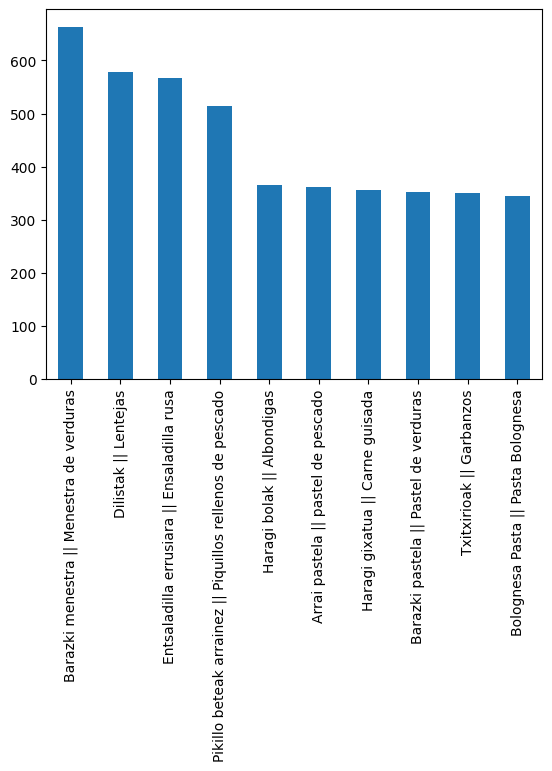

In [ ]:
temp = order_items_final.recipe.value_counts().sort_values(ascending=False).head(10)
print(temp)
temp.plot.bar();

#### ¿Cuales son las alergias mas comunes entre los consumidores?

intolerance    31
alergia        21
Name: type, dtype: int64


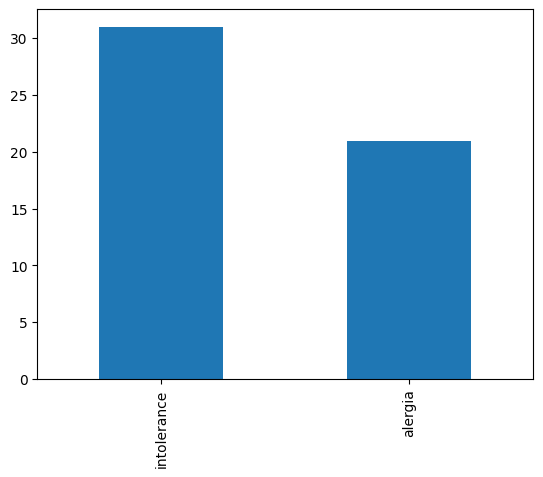

In [ ]:
temp = subscription_allergens_final.type.value_counts().sort_values(ascending=False)
print(temp)
temp.plot.bar();

Begetarianoa || Vegetariana    20
Laktosa || lactosa             11
Glutena|| Gluten                8
Beganoa || Vegano               5
Itsaskiak|| Marisco             3
Sulfitoak || Sulfitos           3
Moluskuak|| Moluscos            2
Name: allergen, dtype: int64


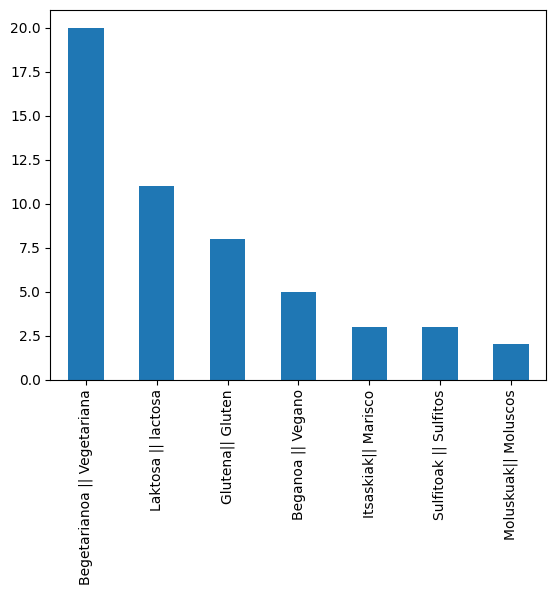

In [ ]:
temp = subscription_allergens_final.allergen.value_counts().sort_values(ascending=False)
print(temp)
temp.plot.bar();

#### ¿Cuál es la evolución semanal entre Gros y Herrera entre el 1 de marzo y el 30 de agosto?

La equipo de cocina de Sukalde realiza dos repartos en dos barrios diferentes de San Sebastián, Gros y Herrera. Necesitaban información de cómo estaban evolucionando los pedidos en un sitio y otro.

<ipython-input-98-4d6ba0081b41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_orders['week'] = filtered_orders['created_at'].dt.strftime('%U')


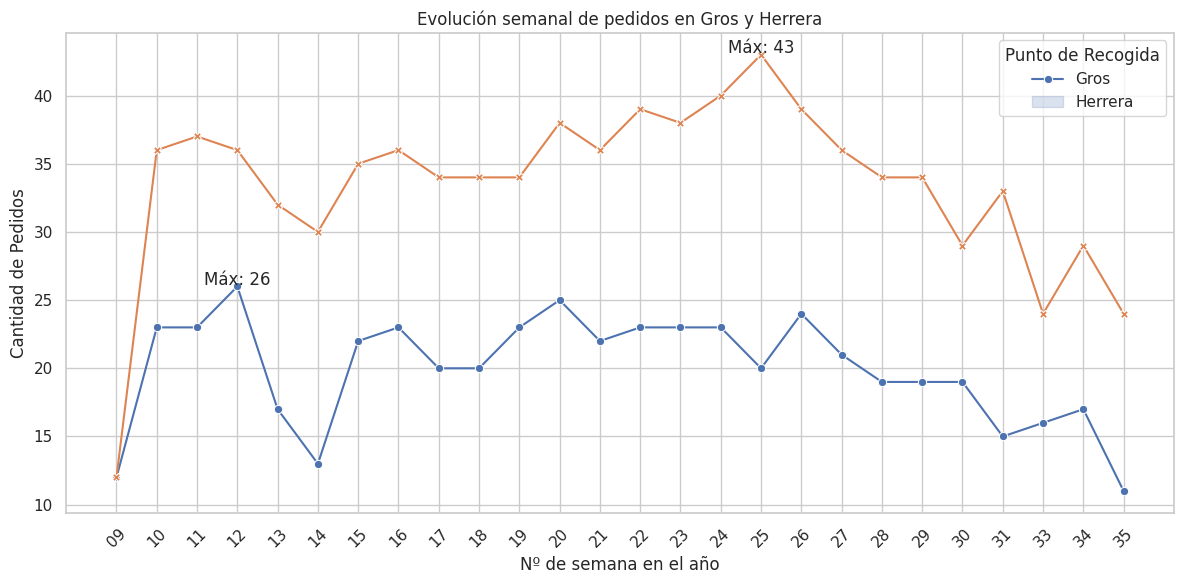

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos el DataFrame para el rango de fechas deseado
start_date = '2023-03-01'
end_date = '2023-08-30'
filtered_orders = orders_final[(orders_final['created_at'] >= start_date) & (orders_final['created_at'] <= end_date)]

# Extraemos la semana de la columna "created_at" y contar las ocurrencias de "Gros" y "Herrera"
filtered_orders['week'] = filtered_orders['created_at'].dt.strftime('%U')
data = filtered_orders.groupby(['week', 'pick_up_point_day1']).size().unstack(fill_value=0)

# Realizamos el gráfico de líneas con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, markers=True, dashes=False)
plt.title('Evolución semanal de pedidos en Gros y Herrera')
plt.xlabel('Nº de semana en el año')
plt.ylabel('Cantidad de Pedidos')
plt.legend(title='Punto de Recogida', labels=['Gros', 'Herrera'])
plt.xticks(rotation=45)
plt.tight_layout()

# Marcamos los valores máximos
for column in data.columns:
    max_value = data[column].max()
    max_week = data[data[column] == max_value].index[0]
    plt.annotate(f'Máx: {max_value}', (max_week, max_value), textcoords="offset points", xytext=(0, 1), ha='center')

plt.show()

#### ¿Cuál es la evolución en ese mismo periodo de las raciones?

Hemos visto los pedidos que se realizaban en un sitio u otro. Pero cada pedido puede contener varias raciones, veamos cómo evolucionan en cada sitio.

<ipython-input-99-00ae5c08fd2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
<ipython-input-99-00ae5c08fd2c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['semana'] = filtered_df['created_at'].dt.strftime('%U')
<ipython-input-99-00ae5c08fd2c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

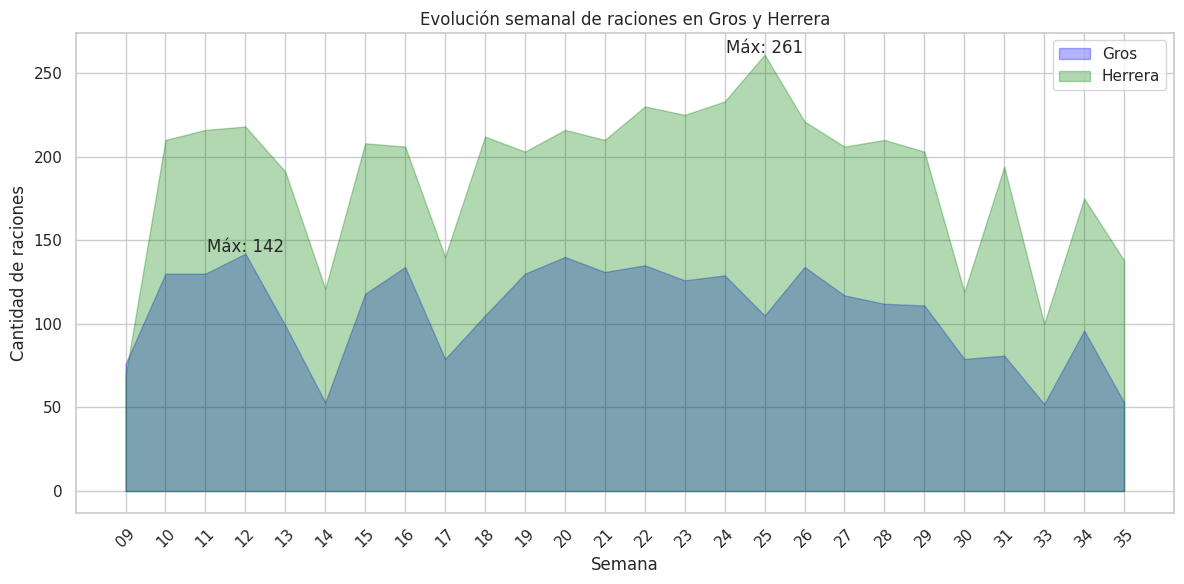

In [ ]:
# En esta ocasión queremos hacer un gráfico de área

start_date = '2023-03-01'
end_date = '2023-08-30'

filtered_df = order_items_final[
    (order_items_final['created_at'] >= start_date) &
    (order_items_final['created_at'] <= end_date)
]

# Convertimos 'created_at' a datetime y extraemos dicha semana
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
filtered_df['semana'] = filtered_df['created_at'].dt.strftime('%U')

# Renombramos los valores en la columna 'pick_up_point'
filtered_df['pick_up_point'] = filtered_df['pick_up_point'].map({4: 'Gros', 1: 'Herrera'})

# Contabilizamos la cantidad de pedidos por semana
weekly_counts = filtered_df.groupby(['semana', 'pick_up_point']).size().reset_index(name='count')

# Realizamos el gráfico de área
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Dividimos por punto de recogida
gros_data = weekly_counts[weekly_counts['pick_up_point'] == 'Gros']
herrera_data = weekly_counts[weekly_counts['pick_up_point'] == 'Herrera']

# Ahora haremos un gráfico de área
plt.fill_between(gros_data['semana'], gros_data['count'], color='blue', alpha=0.3, label='Gros')
plt.fill_between(herrera_data['semana'], herrera_data['count'], color='green', alpha=0.3, label='Herrera')

# Calculamos los puntos máximos para 'Gros' y 'Herrera'
max_gros = weekly_counts[weekly_counts['pick_up_point'] == 'Gros']['count'].idxmax()
max_herrera = weekly_counts[weekly_counts['pick_up_point'] == 'Herrera']['count'].idxmax()

# Los mostramos en el gráfico
plt.annotate(f'Máx: {weekly_counts.loc[max_gros, "count"]}', (weekly_counts.loc[max_gros, 'semana'], weekly_counts.loc[max_gros, 'count']), textcoords="offset points", xytext=(0, 1), ha='center')
plt.annotate(f'Máx: {weekly_counts.loc[max_herrera, "count"]}', (weekly_counts.loc[max_herrera, 'semana'], weekly_counts.loc[max_herrera, 'count']), textcoords="offset points", xytext=(0, 1), ha='center')

plt.xlabel('Semana')
plt.ylabel('Cantidad de raciones')
plt.title('Evolución semanal de raciones en Gros y Herrera')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

#### ¿Cuál es la evolución de socios en ese periodo?

Durante el periodo de marzo y agosto deseaban ver si habían aumentado o disminuido los socios.

<ipython-input-101-12dd24611760>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_users['created_at'] = pd.to_datetime(filtered_users['created_at'])


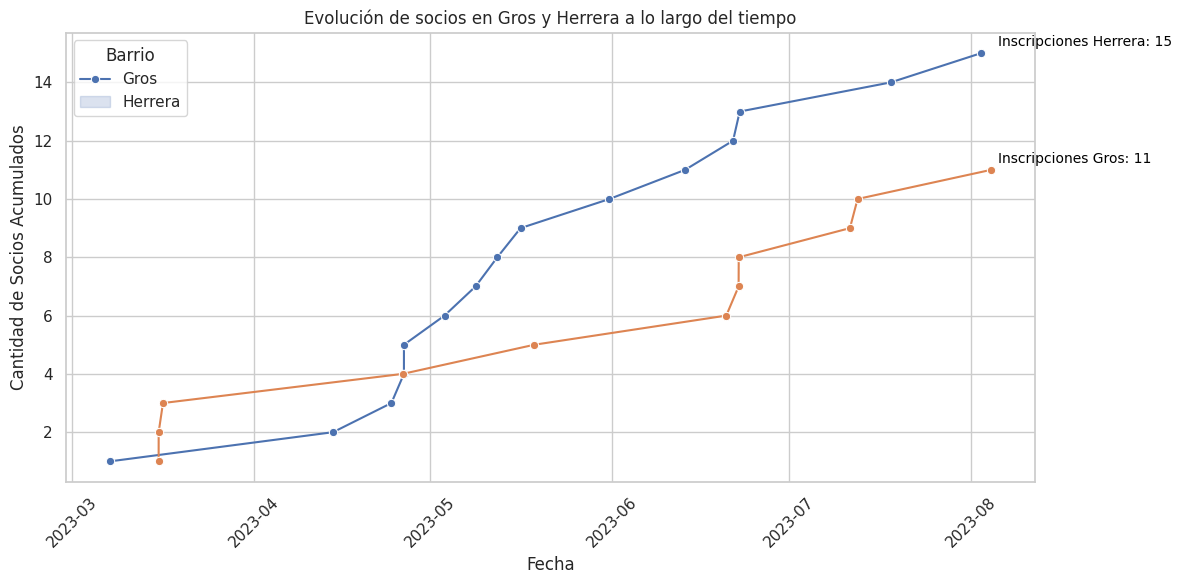

In [ ]:
# Filtrar el DataFrame por fechas
start_date = '2023-03-01'
end_date = '2023-08-30'

filtered_users = users_final[
    (users_final['created_at'] >= start_date) &
    (users_final['created_at'] <= end_date)
]

# Convertir 'created_at' a datetime si no está en ese formato
filtered_users['created_at'] = pd.to_datetime(filtered_users['created_at'])

# Ordenar el DataFrame por 'created_at'
filtered_users = filtered_users.sort_values(by='created_at')

# Crear una columna que acumule la cantidad de socios por barrio
filtered_users['acumulado'] = filtered_users.groupby('pick_up_point').cumcount() + 1

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Crear el gráfico de líneas
sns.lineplot(data=filtered_users, x='created_at', y='acumulado', hue='pick_up_point', marker='o')

final_values = filtered_users.groupby('pick_up_point')['acumulado'].max()
for barrio, value in final_values.items():
    plt.annotate(f'Inscripciones {barrio}: {value}', xy=(filtered_users['created_at'].max(), value), xytext=(5, 5), textcoords='offset points', color='black', fontsize=10, ha='left')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Socios Acumulados')
plt.title('Evolución de socios en Gros y Herrera a lo largo del tiempo')
plt.xticks(rotation=45)
plt.legend(title='Barrio', labels=['Gros', 'Herrera'])

plt.tight_layout()
plt.show()

#### ¿Cuál es el porcentaje de la familia de platos?

Dentro del conjunto de platos que la cocina de Sukalde ofrece deseaban obtener el porcentaje de platos que más se vendían por familia de platos.

<ipython-input-102-fa1629a3a531>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['family_name'] = filtered_df['family_id'].map(families['name'])


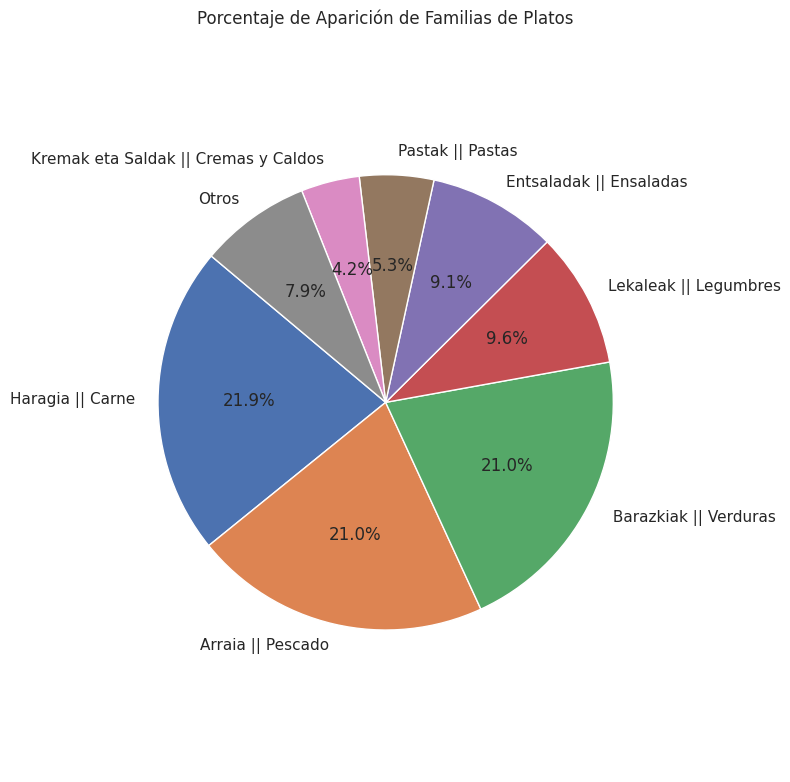

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misma operación de siempre, calculamos entre esas fechas
start_date = pd.Timestamp('2023-03-01')
end_date = pd.Timestamp('2023-08-30')

filtered_df = order_items_final[(order_items_final['created_at'] >= start_date) & (order_items_final['created_at'] <= end_date)]

# Los nombres de familia no están bien, los asignamos correctamente
filtered_df['family_name'] = filtered_df['family_id'].map(families['name'])

# Calculamos el porcentaje de aparición de cada familia
family_percentage = filtered_df['family_name'].value_counts(normalize=True) * 100

# En un primer momento habíamos obtenido un gran grupo de familias que no salían mucho, vamos a agruparlas todas en un mismo grupo
# llamado "Otros" en donde el umbral que marquemos para pertenecer a dicho grupo es menor del 3%.
threshold = 3.0
small_categories = family_percentage[family_percentage < threshold]
family_percentage['Otros'] = small_categories.sum()
family_percentage = family_percentage[family_percentage >= threshold]

sns.set(style="whitegrid")

# Hacemos el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(family_percentage, labels=family_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Aparición de Familias de Platos')

plt.axis('equal')
plt.tight_layout()
plt.show()


#### Evolucion menus completos vs medios menus

Existe una opción cada semana de obtener un menú completo y un medio menú. Observamos los resultados entre marzo y agosto.

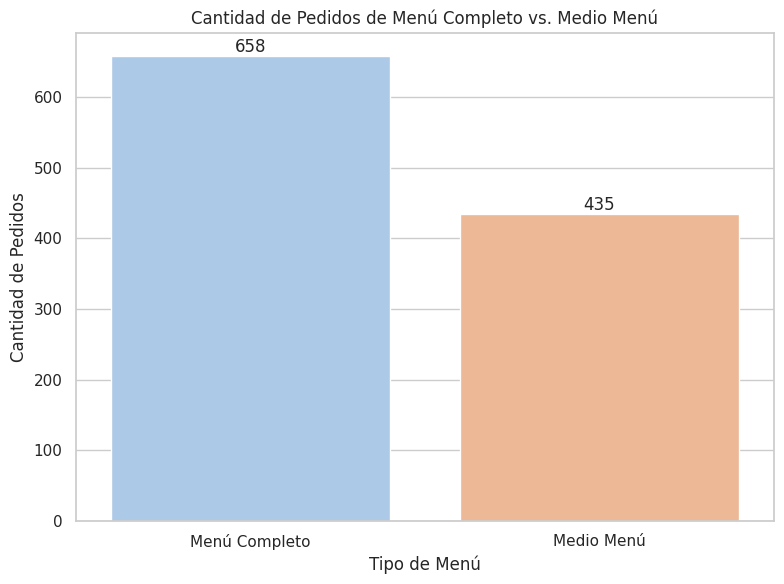

In [ ]:

start_date = '2023-03-01'
end_date = '2023-08-30'

filtered_orders = orders[
    (orders['created_at'] >= start_date) &
    (orders['created_at'] <= end_date)
]

# Seleccionamos solo las columnas relevantes
selected_columns = ['created_at', 'pick_up_time_day_1_id', 'pick_up_time_day_2_id']
filtered_orders = filtered_orders[selected_columns]

# Sacamos los menús completos y medios menús. Aquellos que aparecen al mismo tiempo en esas dos columnas son un menú completo y medio menú si solo aparecen en
# una columna solamente.

completed_menus = ((~filtered_orders['pick_up_time_day_1_id'].isna()) & (~filtered_orders['pick_up_time_day_2_id'].isna()))
half_menus = ((~filtered_orders['pick_up_time_day_1_id'].isna()) & (filtered_orders['pick_up_time_day_2_id'].isna()))

# Contabilizamos la cantidad de menús completos y medios menús que nos han salido
completed_count = completed_menus.sum()
half_count = half_menus.sum()

# Creamos un DataFrame para los resultados
data = pd.DataFrame({'Tipo de Menú': ['Menú Completo', 'Medio Menú'],
                     'Cantidad': [completed_count, half_count]})

# Hacemos el gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(data=data, x='Tipo de Menú', y='Cantidad', palette="pastel", saturation=0.7)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Tipo de Menú')
plt.ylabel('Cantidad de Pedidos')
plt.title('Cantidad de Pedidos de Menú Completo vs. Medio Menú')

plt.tight_layout()
plt.show()

#### Evolución raciones lunes vs miércoles

Al igual que existen dos puntos de recogida diferentes en dos barrios diferentes de San Sebastián, existen dos días de recogida, el lunes y el miércoles. Veamos la evolución en esos días.

<ipython-input-104-7753e385ea5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
<ipython-input-104-7753e385ea5b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['semana'] = filtered_df['created_at'].dt.strftime('%U')
<ipython-input-104-7753e385ea5b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

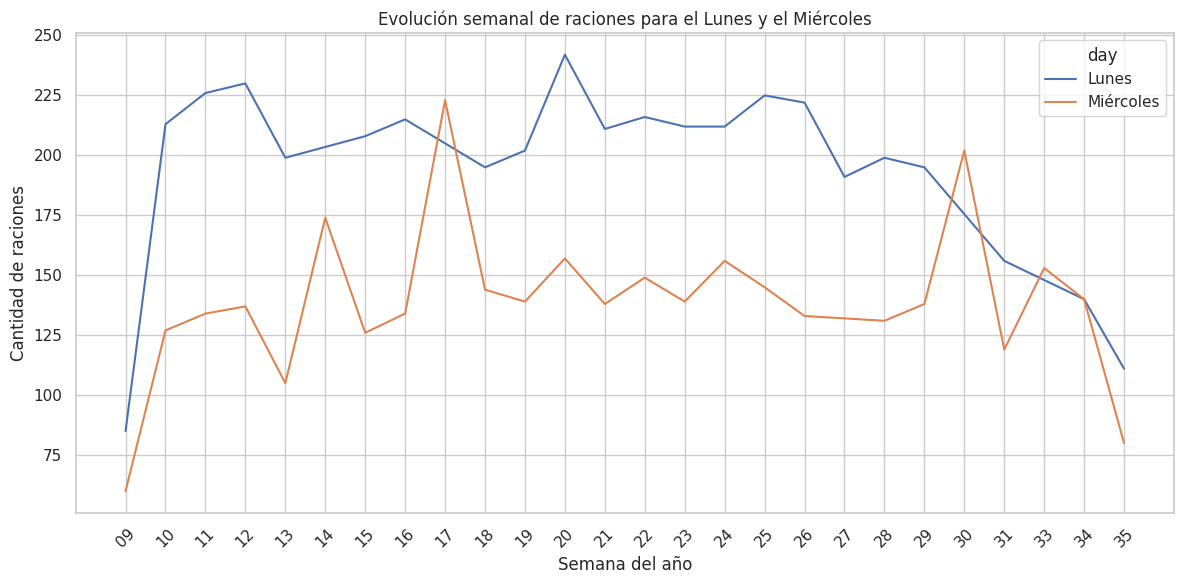

In [ ]:

start_date = '2023-03-01'
end_date = '2023-08-30'

filtered_df = order_items_final[
    (order_items_final['created_at'] >= start_date) &
    (order_items_final['created_at'] <= end_date)
]

filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
filtered_df['semana'] = filtered_df['created_at'].dt.strftime('%U')

# Cambiamos el nombre de los valores que nos da la tabla por los días Lunes y Miércoles
filtered_df['day'] = filtered_df['day'].map({"day_1": 'Lunes', "day_2": 'Miércoles'})

# Sacamos la cantidad de pedidos por semana
weekly_counts = filtered_df.groupby(['semana', 'day']).size().reset_index(name='count')



# Hacemos el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_counts, x='semana', y='count', hue='day')
plt.xlabel('Semana del año')
plt.ylabel('Cantidad de raciones')
plt.title('Evolución semanal de raciones para el Lunes y el Miércoles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Porcentaje de raciones lunes y miércoles en ese periodo

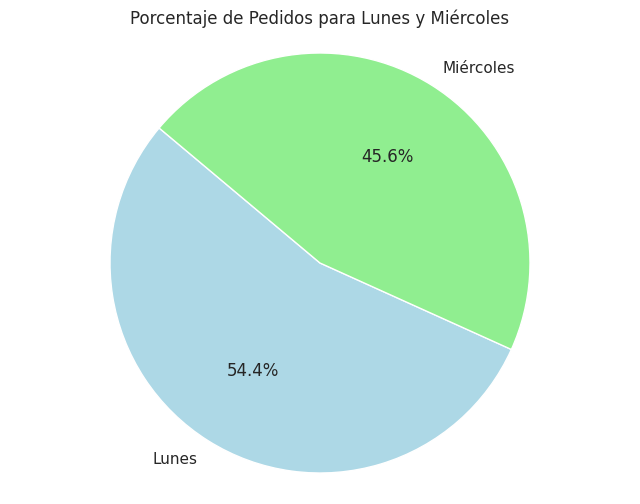

In [ ]:

start_date = '2023-03-01'
end_date = '2023-08-30'
filtered_df = order_items_final[(order_items_final['created_at'] >= start_date) & (order_items_final['created_at'] <= end_date)]

# Ahora, necesitas contar cuántos pedidos se hicieron en lunes (day_1) y en miércoles (day_2)
counts = filtered_df['day'].value_counts()

# Cambiamos otra vez las etiquetas de "day_1" y "day_2" a "Lunes" y "Miércoles"
counts.index = counts.index.map({'day_1': 'Lunes', 'day_2': 'Miércoles'})

# Realizamos el gráfico de tarta
plt.figure(figsize=(8, 6))
plt.title('Porcentaje de Pedidos para Lunes y Miércoles')
labels = counts.index
colors = ['lightblue', 'lightgreen']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.show()

#### Usuarios con más de diez pedidos entre marzo y agosto

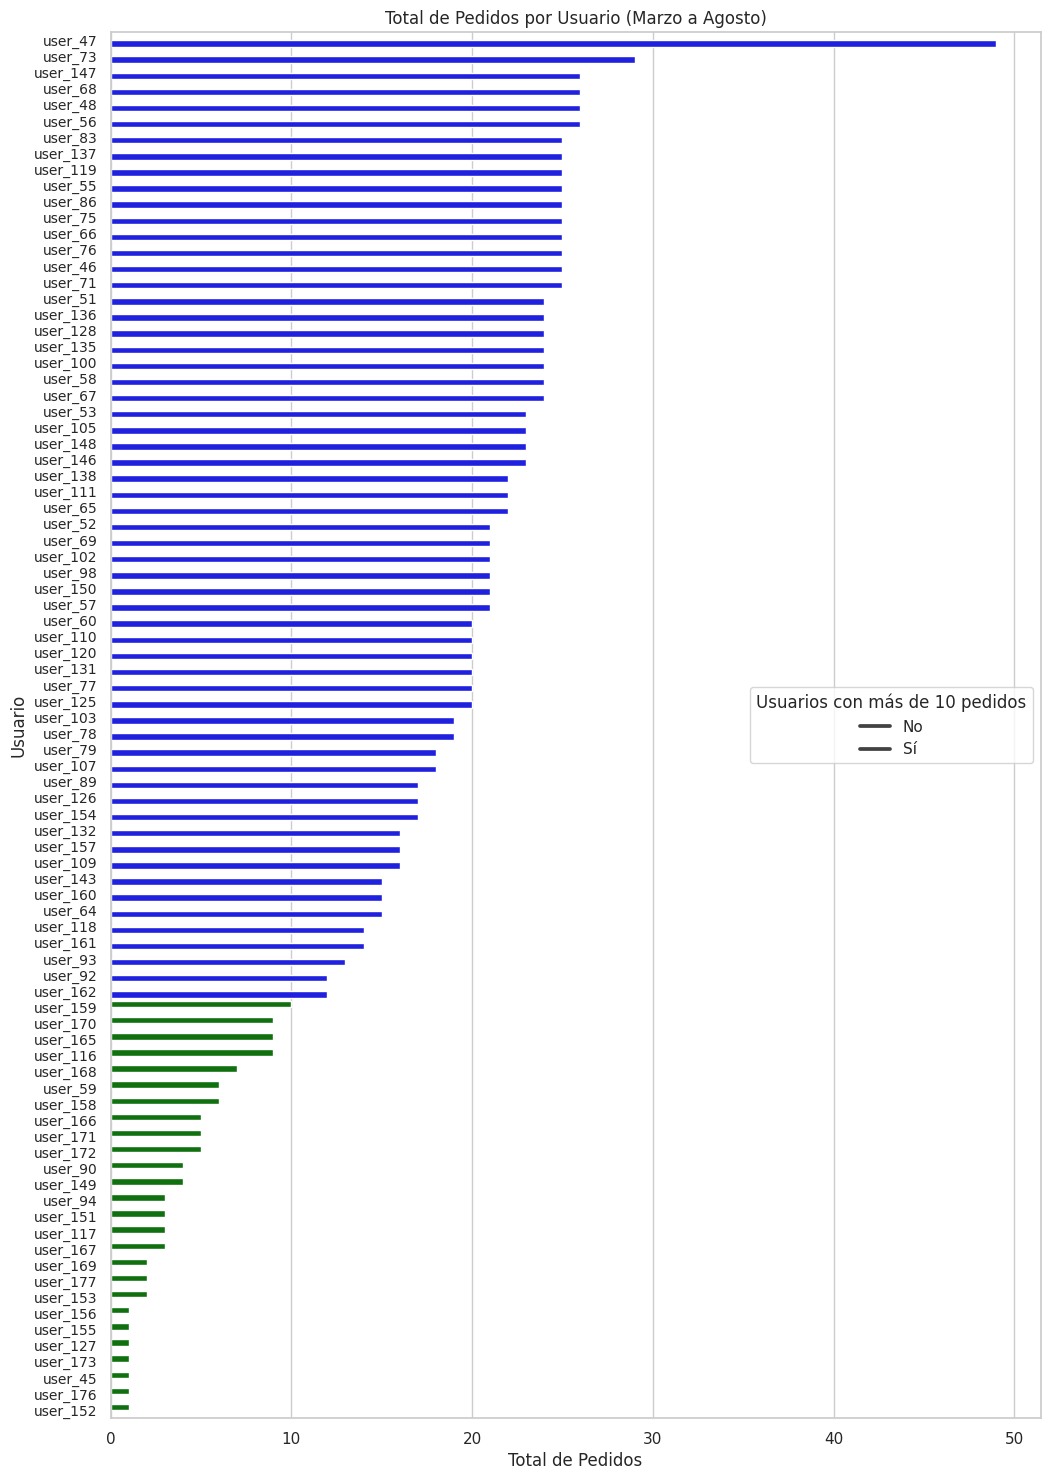

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders_final['created_at'] = pd.to_datetime(orders_final['created_at'])

start_date = pd.to_datetime('2023-03-01')
end_date = pd.to_datetime('2023-08-30')
filtered_orders = orders_final[(orders_final['created_at'] >= start_date) & (orders_final['created_at'] <= end_date)]

# Calculamos el total de pedidos por usuario en el rango de fechas
total_pedidos_por_usuario = filtered_orders['user'].value_counts().reset_index()
total_pedidos_por_usuario.columns = ['Usuario', 'Total de Pedidos']

# Vamos a crear una columna para marcar a los usuarios con más de 10 pedidos
total_pedidos_por_usuario['Mas de 10 Pedidos'] = total_pedidos_por_usuario['Total de Pedidos'] > 10

# Creamos la gráfica utilizando Seaborn con barras horizontales
plt.figure(figsize=(12, 18))
ax = sns.barplot(x='Total de Pedidos', y='Usuario', data=total_pedidos_por_usuario, hue='Mas de 10 Pedidos', palette=['green', 'blue'])
plt.title('Total de Pedidos por Usuario (Marzo a Agosto)')
plt.xlabel('Total de Pedidos')
plt.ylabel('Usuario')
plt.legend(title='Usuarios con más de 10 pedidos', labels=['No', 'Sí'])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.show()

#### Agrupación de usuarios por categorías:

Como la gráfica no es muy informativa vamos a agrupar a los usuarios en 4 grupos:

a) Hasta 4 pedidos

b) de 4 a 9

c) de 10 a 15  

d) + de 15

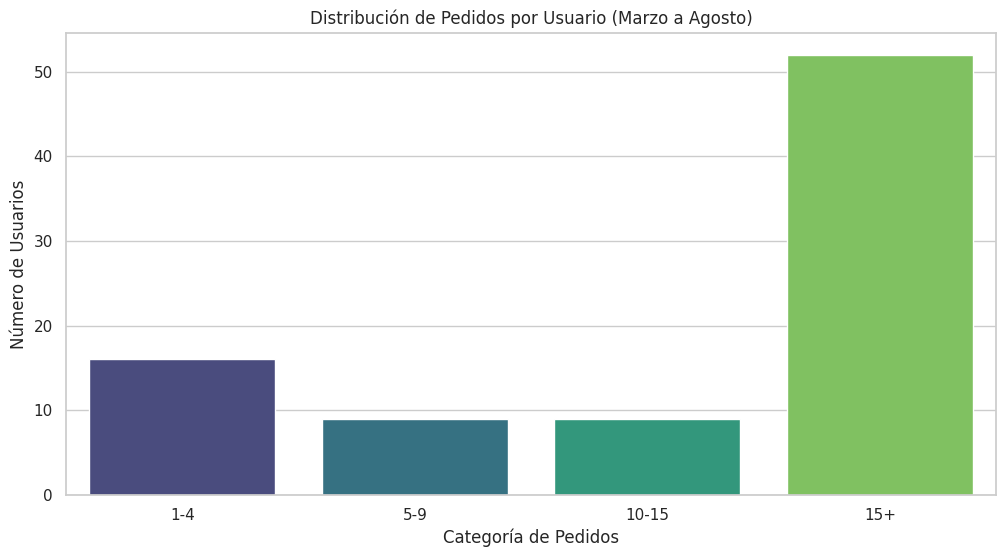

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders_final['created_at'] = pd.to_datetime(orders_final['created_at'])

start_date = pd.to_datetime('2023-03-01')
end_date = pd.to_datetime('2023-08-30')
filtered_orders = orders_final[(orders_final['created_at'] >= start_date) & (orders_final['created_at'] <= end_date)]

total_pedidos_por_usuario = filtered_orders['user'].value_counts().reset_index()
total_pedidos_por_usuario.columns = ['Usuario', 'Total de Pedidos']

# Ahora definimos esas 4 categorías de pedidos por usuario
categorias_pedidos = ['1-4', '5-9', '10-15', '15+']
bin_edges = [0, 4, 9, 15, float('inf')]

# Los agrupamos
total_pedidos_por_usuario['Categoría de Pedidos'] = pd.cut(total_pedidos_por_usuario['Total de Pedidos'], bins=bin_edges, labels=categorias_pedidos)

# Sacamos la gráfica utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoría de Pedidos', data=total_pedidos_por_usuario, palette='viridis')
plt.title('Distribución de Pedidos por Usuario (Marzo a Agosto)')
plt.xlabel('Categoría de Pedidos')
plt.ylabel('Número de Usuarios')

plt.show()